<a href="https://colab.research.google.com/github/vicentesarabia/ADA_informes/blob/main/Informe3_subarreglo_maximo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.- Problema
Entrada = [3,-6,-3,7.....n]

Salida = índice menor, índice mayor, suma arreglo máximo





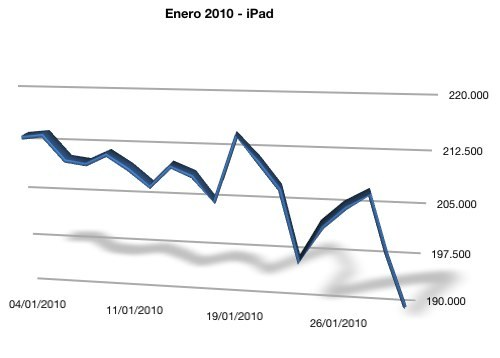

En este problema entra un arreglo de n elementos, en la cual se espera que en su salida entregue la suma del subarreglo máximo, ósea, la mayor suma que se puede generar en el arreglo de n elementos, y al mismo tiempo entregue los índices en donde se encuentra este subarreglo máximo.

Una aplicación de este problema es, por ejemplo, es cuando invertir en acciones, viendo la subida y bajada de las acciones y saber cuando es más conveniente invertir o no.

# 2.- Descripción del algoritmo

**2.1 Descripción función MaxSubArrayMid**

Esta función va recorriendo el arreglo entrante en dos mitades, con el objetivo de encontrar la máxima suma que hay dentro de este arreglo, retornando la posición i(inicio del subarreglo con máxima suma), la posición j(límite máximo del subarreglo con la máxima suma) y la suma que da este subarreglo.

Los pasos de esta función son:

-entran los índices low,mid,high, siendo low el índice más pequeño, mid el índice del sub arreglo que crea el límite para buscar, y high como el índice más alto.

-luego se divide el arreglo en izquierda y derecha, en cada uno comprobando cuál es el máximo subarreglo que se puede crear entre ellos, recorriendo ese suba arreglo desde mid hasta low, y del otro caso desde mid hasta high, encontrando la maxima suma entre estos dos sub arreglos retornando la posición más alta de cada uno, dejando el índice mayor del subarreglo izquierdo como el menor, el derecho como el mayor, e igualmente retornando la suma entre las máximas sumas de los dos subarreglos


**Implementacion funcion MaxSubArrayMid**

A continuación la implementación de la función MaxSubArrayMid

In [ ]:
import math

def MaxSubArrayMid(A, low, mid, high,verbose):
    
    if verbose==True:print("datos entrada MaxSubArrayMid ","low: ",low,"mid: ",mid,"high: ",high)
    if(low==mid):
      if verbose==True:print("dentro maxsubmidiz: ",A[low])
    else:
      if verbose==True:print("dentro maxsubmidiz: ",A[low:mid+1])
    max_left, max_right = -1, -1
    # parte izquierda del subarreglo
    left_sum = float("-Inf")
    sum = 0
    
    for i in range(mid, low - 1, -1):
      
        
        sum += A[i]
        if (sum > left_sum):
            
            left_sum = sum
            
            max_left = i
 
    # parte derecha del subarreglo
    
    if verbose==True:print("dentro maxsubmiddere: ",A[mid+1:high+1])
    right_sum = float("-Inf")
    sum = 0
    for j in range(mid + 1, high + 1):
        
        sum += A[j]
        
        if (sum > right_sum):
           
            
            right_sum = sum
            
            max_right = j
    if verbose==True:print("max indice iz: ",max_left,"max indice derecha: ",max_right,"suma total max iz y derecha: ",left_sum + right_sum)
    return max_left, max_right, left_sum + right_sum

**2.2 Descripción MaxSubArray**

En esta función entra un arreglo de n elementos en el cual se va dividiendo en una variable llamada mid hasta que este tenga solo un elemento, retornando la posición low(más pequeña), la posición high(más alta), y la posición A[low], una vez no quedan más subarreglos de 1 elemento, estos entran en una condición, dependiendo que condición sea la acertada, retorna esos datos, para que se pueda ir comparando, hasta que este llega al resultado esperado que son los índices de este sub arreglo y la suma entre los elementos que es la máxima suma que se podía hacer el arreglo con sus elementos

**Implementación función MaxSubArray**

A continuación la implementación de la función MaxSubArray

In [ ]:
import math
 
def MaxSubArray(A, low, high,verbose=False):
    if verbose==True: print("indices de entrada: ", low, " ",high)
    if (high == low):
        return low, high, A[low]
    else:
        mid = math.floor((low + high) / 2)
        if verbose==True: print("mid: ",mid)
        
        left_low, left_high, left_sum = MaxSubArray(A, low, mid,verbose)
        if verbose==True: print("subarreglo izq: ",A[left_low:left_high+1])
        if verbose==True: print("iz_menor: ",left_low,"iz_mayor", left_high,"izq_suma", left_sum)
       
        right_low, right_high, right_sum = MaxSubArray(A, mid + 1, high,verbose)
        if verbose==True: print("subarreglo derecha: ",A[right_low:right_low+1])
        if verbose==True: print("dere_low: ",right_low,"dere_mayor", right_high,"dere_suma", right_sum)
        cross_low, cross_high, cross_sum = MaxSubArrayMid(A, low, mid, high,verbose)

        #comparacion para retornar mayor suma
        if (left_sum >= right_sum and left_sum >= cross_sum):
            if verbose==True: print("retorna izquierda suma mayor")
            return left_low, left_high, left_sum
        elif (right_sum >= left_sum and right_sum >= cross_sum):
            if verbose==True: print("retorna derecha suma mayor")

            return right_low, right_high, right_sum
        else:
            if verbose==True: print("retorna medio suma mayor")
            return cross_low, cross_high, cross_sum
 


 
def main():
    A = [1,6,3,-5]
    izq,der,suma=MaxSubArray(A, 0, len(A) - 1)
    print("los indices son :",izq," ",der,"y la suma es " ,suma)
    print("Arreglo: ",A)
    print("SubArreglo suma maxima: ",A[izq:der+1])


main()


los indices son : 0   2 y la suma es  10
Arreglo:  [1, 6, 3, -5]
SubArreglo suma maxima:  [1, 6, 3]


**2.3 Ejemplo**

$arreglo=[1,6,3,-5,-1,3]$

1.-$[1,6,3,-5]$

2.-$[1,6]$

3.-iz=$[1]$

suma maxima 1,low=0,high=0

4.-derecha=$[6]$

suma maxima 6,low=1,high=1

5.-mid=$[1,6]$

suma maxima 7,low=0,high=1

6.- iz=$[3]$

suma maxima 3,low=2,high=2

7.- derecha=$[-5]$

suma maxima -5,low=3,high=3

8.- mid=$[3,-5]$

suma maxima -2,low=2, high=3

9.-mid=$[1,6,3,-5]$

suma maxima 10,low=0,high=2

subarreglo con la suma maximo
$[1,6,3]$





**2.4 verbose=True**

A continuación el algoritmo con la variable **verbose=True** para mostrar el procedimiento de este

In [12]:
import random

A = random.sample(range(-25, 25),4)
cont=0
iteracion=0
print("arreglo generado al alzar inicial = " ,A)
izq,der,suma=MaxSubArray(A, 0, len(A) - 1,True)
print("Arreglo: ",A)
print("los indices son :",izq," ",der,"y la suma es " ,suma)
print("SubArreglo suma maxima: ",A[izq:der+1])

arreglo generado al alzar inicial =  [16, 8, 11, -24]
indices de entrada:  0   3
mid:  1
indices de entrada:  0   1
mid:  0
indices de entrada:  0   0
subarreglo izq:  [16]
iz_menor:  0 iz_mayor 0 izq_suma 16
indices de entrada:  1   1
subarreglo derecha:  [8]
dere_low:  1 dere_mayor 1 dere_suma 8
datos entrada MaxSubArrayMid  low:  0 mid:  0 high:  1
dentro maxsubmidiz:  16
dentro maxsubmiddere:  [8]
max indice iz:  0 max indice derecha:  1 suma total max iz y derecha:  24
retorna medio suma mayor
subarreglo izq:  [16, 8]
iz_menor:  0 iz_mayor 1 izq_suma 24
indices de entrada:  2   3
mid:  2
indices de entrada:  2   2
subarreglo izq:  [11]
iz_menor:  2 iz_mayor 2 izq_suma 11
indices de entrada:  3   3
subarreglo derecha:  [-24]
dere_low:  3 dere_mayor 3 dere_suma -24
datos entrada MaxSubArrayMid  low:  2 mid:  2 high:  3
dentro maxsubmidiz:  11
dentro maxsubmiddere:  [-24]
max indice iz:  2 max indice derecha:  3 suma total max iz y derecha:  -13
retorna izquierda suma mayor
subarregl

# 3.- Correctitud de las funciones

**3.1 Teorema correctitud MaxSubArray**

La función MaxSubArray entra una arreglo de n elementos con sus respectivos índices y sale la máxima suma que se puede generar con sus elementos, retornando sus índices y el valor de la suma

**3.2 Prueba de correctitud**

Para comprobar la correctitud de MaxSubArray como es una función recursiva se tiene que utilizar el método de inducción, comprobando que el caso base y el paso inductivo sean verdaderos, de ser así MaxSubArray es correcto

Para la base de nuestro método inductivo vamos a tener un P(n)

**caso base:**

Suponemos que n=1 entonces P(1), al ser un solo elemento la función MaxSubArray retorna un solo elemento, por lo cual el caso base el correcto.

**paso inductivo:**

En este paso hay que probar que m<n en todas las recursiones

Cuando entra el arreglo este se divide por lo cual podemos decir que m=n/2 y m=n/2, como el problema se va dividiendo hasta tener solo un elemento, m nunca va a ser mayor que n por lo que podemos decir que MaxSubArray es correcto


**3.3 Teorema correctitud MaxSubArrayMid**

En la función MaxSubArrayMid entra un arreglo de n elementos con su índice menor, el índice que parte el arreglo a la mitad(mid) y su índice mayor, y retorna un arreglo con los índices del sub arreglo que genera la máxima suma entre sus elementos

**3.4 Prueba de correctitud**

Para probar nuestro teorema debemos usar la propiedad de bucle invariante, la cual es la siguiente:

**Inicialización:**

Entran 3 índices por lo que por lo que en la primera iteración entra un arreglo de tamaño 1 en el cual se dividirá en dos for, uno de la izquierda del arreglo y otra la derecha, al ser solo un elemento en estos dos subarreglos, se suman entre sí retornando la suma y los índices

**mantención:**
 
En cualquier iteración se recorrerá el for izquierdo y derecho, sacando la máxima suma de esos subarreglos, ya que siempre van a entrar índices, el arreglo no se modifica, por lo que el cualquier caso siempre va a retornar la máxima suma con sus respectivos índices

# 4.- Tiempo de ejecución

**4.1 Teorema**

El algoritmo de máximo subarreglo usando divide y vencerás es de O(nlogn)

**4.2 Prueba de teorema**

Este algoritmo se va constantemente dividiendo el problema en dos, creando dos subarreglos con los índices entregados, por lo que el problema aparte de dividir el problema en 2 también se ejecuta dos veces, por lo cual la primera parte que podemos sacar por medio de la ecuación de recurrencia es $T(n)=2T(n/2)$.

Luego queda el conquistar, la cual queda en la ecuación de recurrencia como O(n), ya que este va comparando los resultados, al unir estas dos funciones que de siguiente ecuación de recurrencia

$T(n)=2T(n/2)+O(n)$

Para confirmar que esta ecuación de recurrencia es O(nlogn) usaremos el **Teorema maestro**, que se mostrara en la imagen a continuación su procedimiento

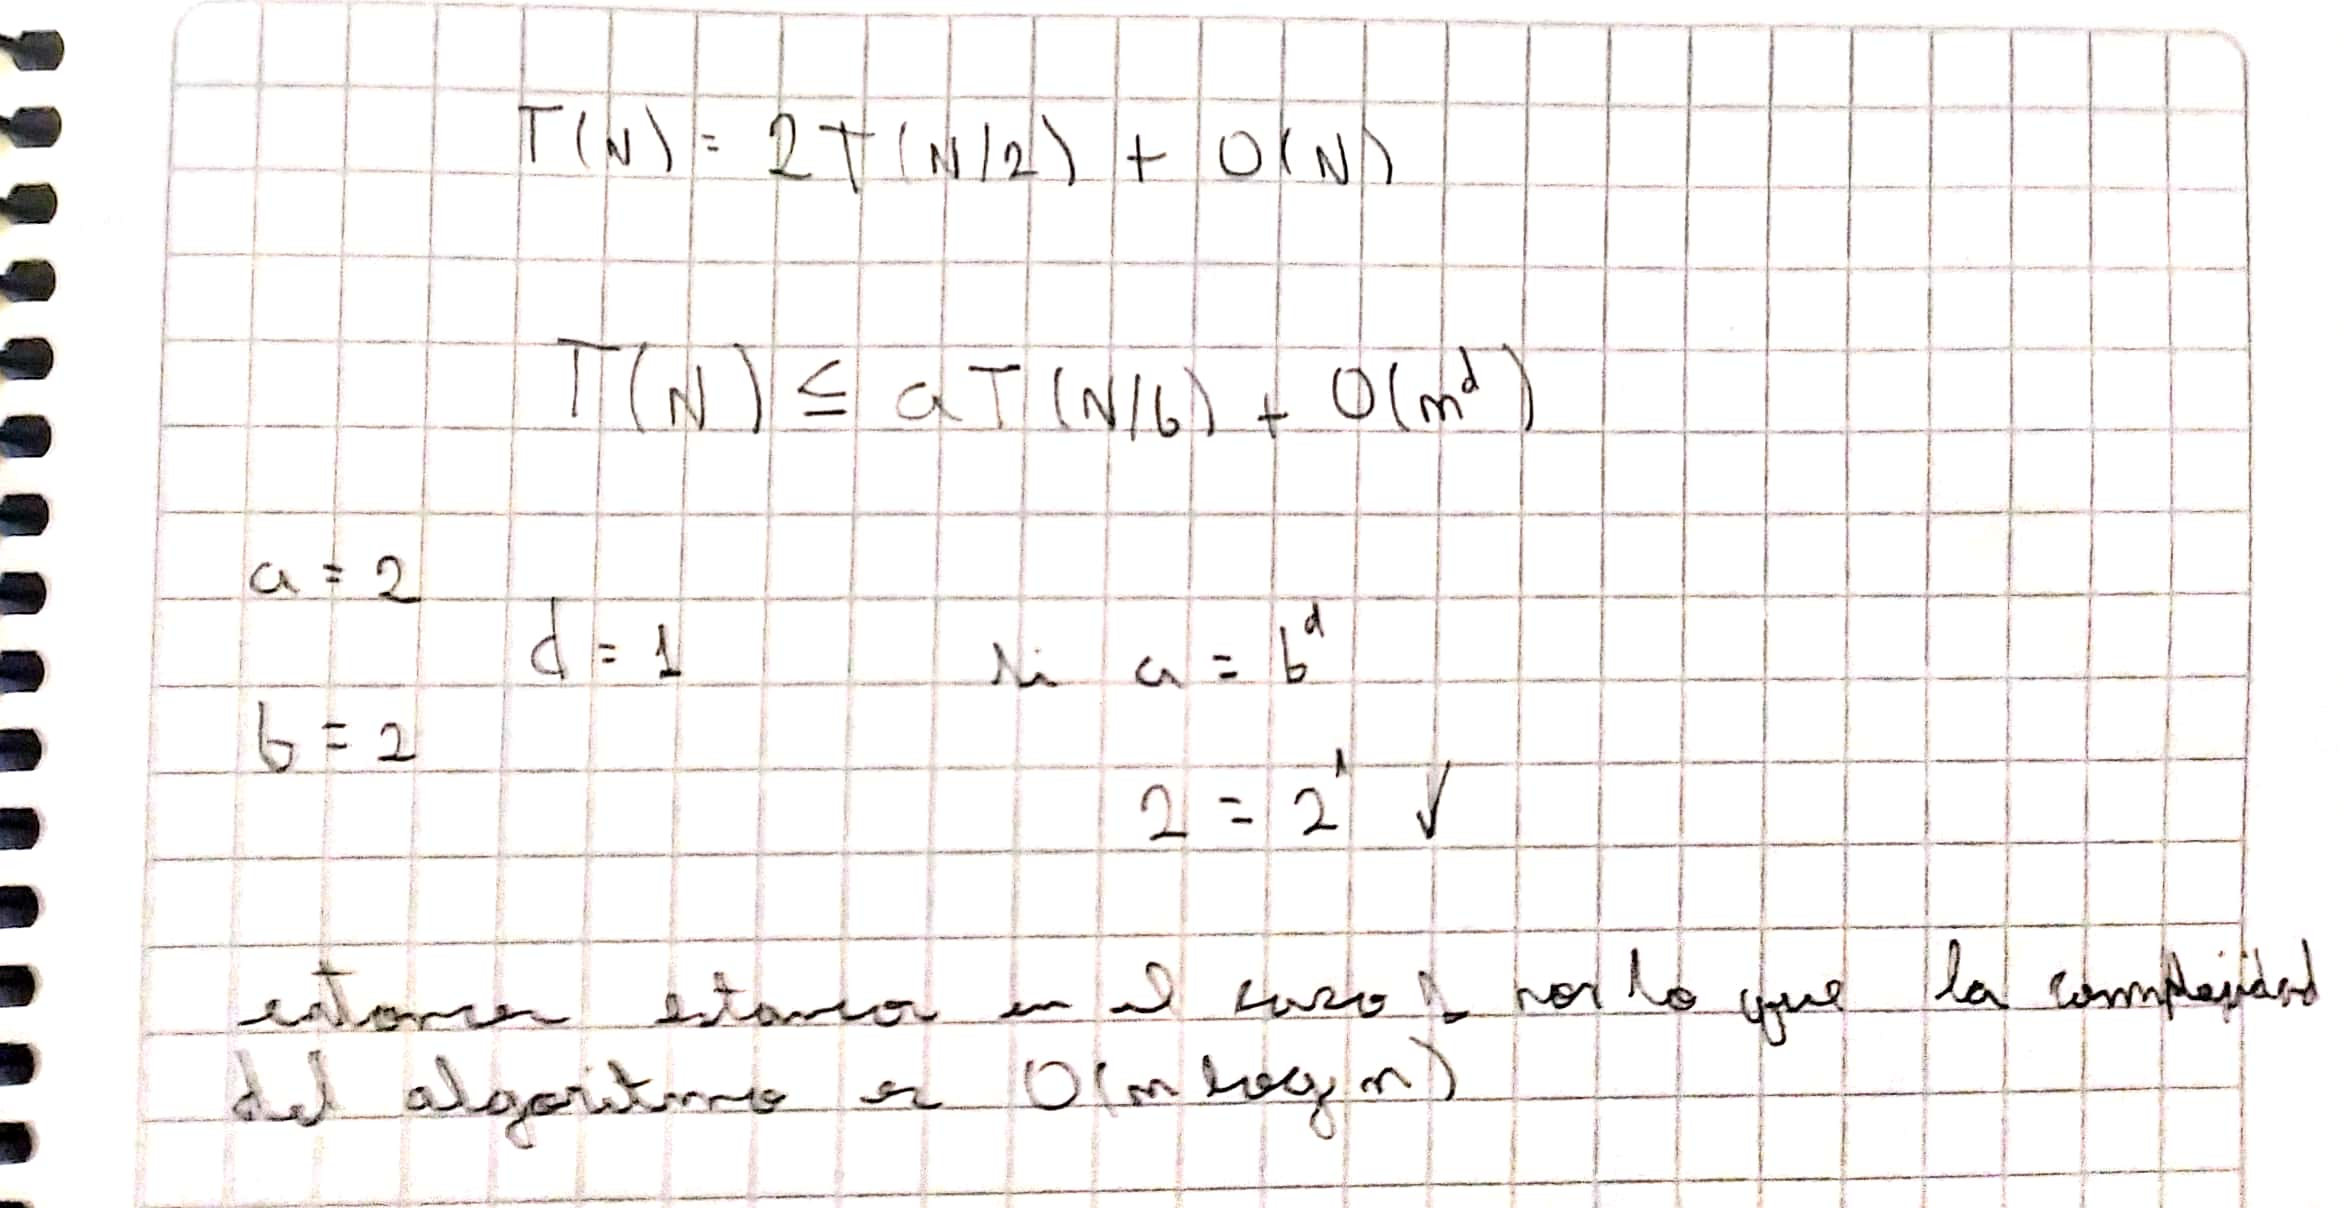

# 5.- Experimentos

**5.1 Experimento 1**

En nuestro primer experimento vamos a comparar nuestro algoritmo de máximo subarreglo implementado con divide y vencerás contra el algoritmo de kadane comparando entre su tiempo de ejecución con problemas random que van de tamaño 5 hasta el 500.

Para eso tenemos que implementar el algoritmo de kadane que es el siguiente:

In [ ]:
# algoritmo de kadane
def Kadane(a, size):
    max_so_far = float("-inf")
    max_ending_here = 0
 
    for i in range(size):
        max_ending_here = max_ending_here + a[i]
        if (max_so_far < max_ending_here):
            max_so_far = max_ending_here
 
        if max_ending_here < 0:
            max_ending_here = 0
    return max_so_far


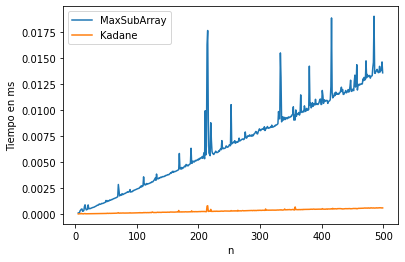

In [ ]:
import random
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x,y,y1 = [],[],[]

for n in range(5,500):

  a = random.sample(range(-50, 500), n)

  
  t = repeat(setup="from __main__ import MaxSubArray", stmt=f"MaxSubArray({a},{0},{len(a)-1})", repeat=1, number=10)
  j = repeat(setup="from __main__ import Kadane", stmt=f"Kadane({a},{len(a)-1})", repeat=1, number=10)
  x.append(n)
  y.append(t)
  y1.append(j)


plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["MaxSubArray","Kadane"])


plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

**Observaciones y análisis:**

Como podemos apreciar el algoritmo de kadane tiene un menor tiempo de ejecución comparado con el nuestro MaxSubArray y esto es razonable, ya que el tiempo de ejecución de nuestro algoritmo MaxSubArray tiene una complejidad temporal de $O(nlogn)$, en cambio, el algoritmo de kadane tiene una complejidad de $O(n)$ que es lo que efectivamente muestra la gráfica.

**5.2 Experimento 2**

En este experimento vamos a comprar el tiempo de ejecución de nuestro algoritmo, pero esta vez usando programación dinámica para poder ver cuál es la diferencia entre estos 

para eso vamos a implementar la siguiente función:


In [ ]:

def DP_maximum_subarray(arr):
    t = len(arr)
    MS = [0]*t
    MS[0] = arr[0]
 
    for i in range(1, t):
        MS[i] = max(MS[i-1]+arr[i], arr[i])

    
    return MS
 


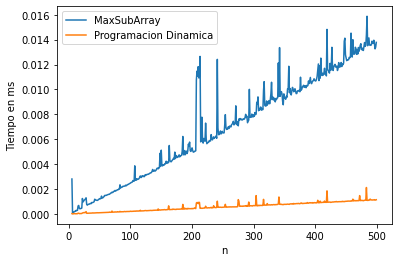

In [ ]:
import random
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x,y,y1 = [],[],[]

for n in range(5,500):

  a = random.sample(range(-250, 750), n)

  
  t = repeat(setup="from __main__ import MaxSubArray", stmt=f"MaxSubArray({a},{0},{len(a)-1})", repeat=1, number=10)
  j = repeat(setup="from __main__ import DP_maximum_subarray", stmt=f"DP_maximum_subarray({a})", repeat=1, number=10)
  x.append(n)
  y.append(t)
  y1.append(j)


plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["MaxSubArray","Programacion Dinamica"])


plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

**Observaciones y análisis**

Podemos observar que la en nuestro problema la programación dinámica es mucho más eficiente en tema de tiempo, a simple vista se puede decir que es $O(N)$, pero es esto cierto?.

Como surge esta nueva pregunta realizaremos otro experimento comparando el tiempo de ejecución de la forma de programación dinámica y el algoritmo de kadane
para ver quien tiene una complejidad menor o la misma complejidad.


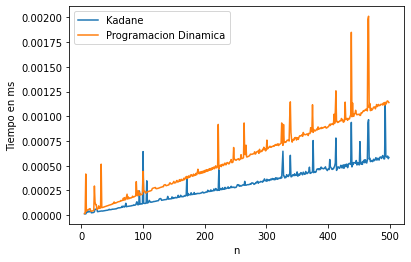

In [ ]:
import random
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x,y,y1 = [],[],[]

for n in range(5,500):

  a = random.sample(range(-250, 750), n)

  
  t = repeat(setup="from __main__ import Kadane", stmt=f"Kadane({a},{len(a)-1})", repeat=1, number=10)
  j = repeat(setup="from __main__ import DP_maximum_subarray", stmt=f"DP_maximum_subarray({a})", repeat=1, number=10)
  x.append(n)
  y.append(t)
  y1.append(j)


plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Kadane","Programacion Dinamica"])


plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

Se puede observar que en tema de tiempo el algoritmo de kadane es mucho más eficiente, ya que este tarda menos que el algoritmo de divide y vencerás y el de programación dinámica.